# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
# !pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library for splitting data into train and test
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [3]:
hotel_df = pd.read_csv("C:/Users/mardin/Downloads/DATASETS - SUPERVISED LEARNING/INNHotelsGroup.csv")

In [4]:
data = hotel_df.copy()

## Data Overview

- Observations
- Sanity checks

#### Viewing the first and last five rows of the dataset

In [5]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [6]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


#### Checking the shape of the dataset

In [7]:
data.shape

(36275, 19)

The dataset has 36,275 rows and 19 columns

#### Checking the data types for each column

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Checking for duplicates and missing values

In [9]:
# Checking for duplicates
data.duplicated().sum()

0

In [10]:
# Checking for missing values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are neither duplicates nor missing values

#### Checking for unique values

In [11]:
data.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

##### To proceed, the "Booking_ID" column will be dropped first

In [12]:
data = data.drop(["Booking_ID"], axis=1)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


#### Check the statistical summary of the data

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

##### To carry out EDA, the below functions need to be defined

In [14]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [16]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [17]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### 1. What are the busiest months in the hotel?

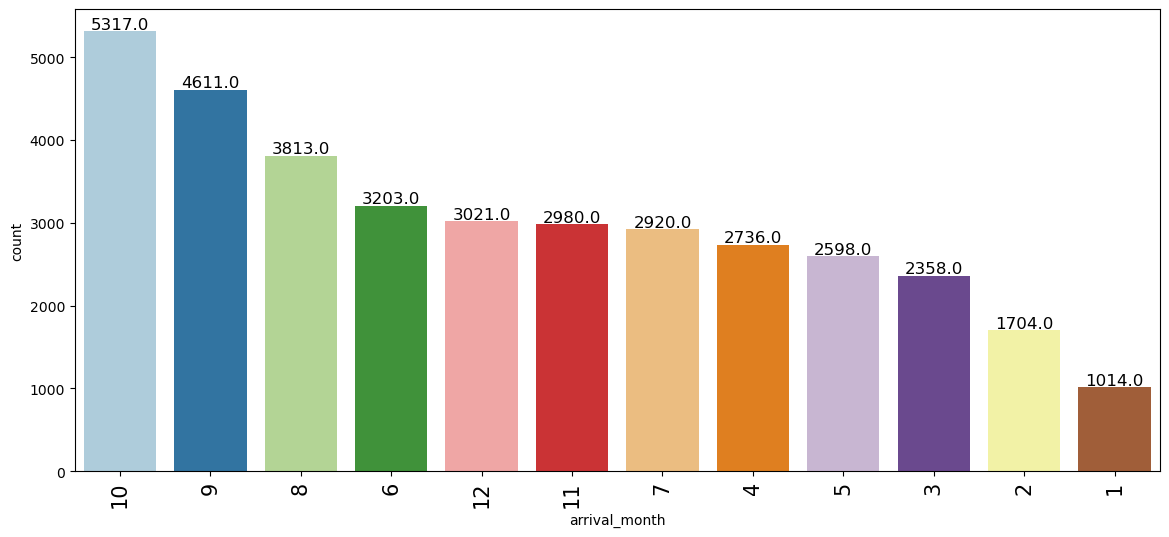

In [18]:
labeled_barplot(data, 'arrival_month')

The busiest months are October, September and August as they are the top 3 months with the highest arrival month counts.

#### 2. Which market segment do most of the guests come from?

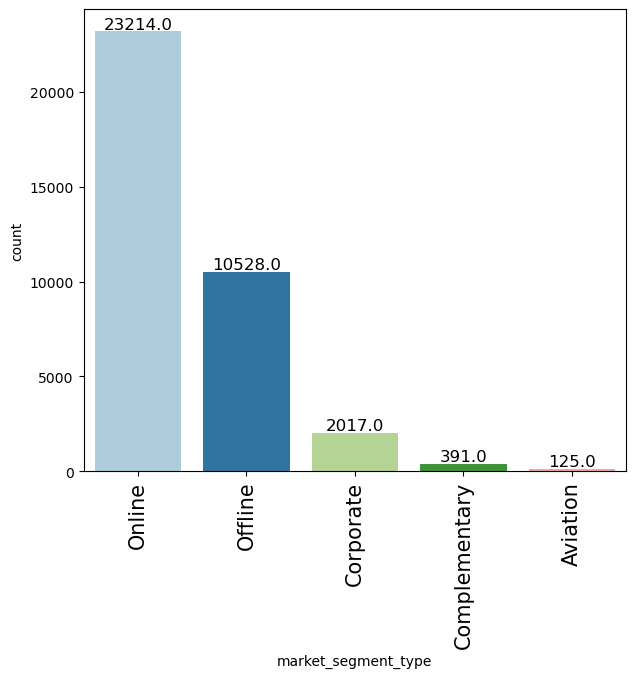

In [19]:
labeled_barplot(data, 'market_segment_type')

Most of the guests come from the online market segment.

#### 4. What percentage of bookings are canceled?

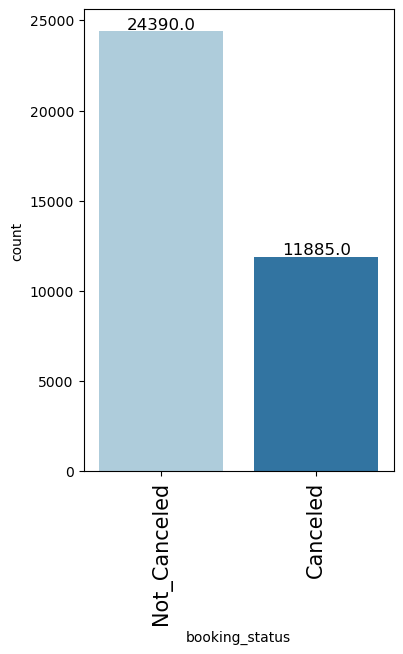

In [20]:
labeled_barplot(data, 'booking_status')

In [21]:
cancelled_bookings = (11885/(11885+24390)) * 100
print(f'The percentage of cancelled bookings is {cancelled_bookings:.2f}%')

The percentage of cancelled bookings is 32.76%


##### 32.76% of bookings are cancelled.

### Bivariate Analysis

#### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

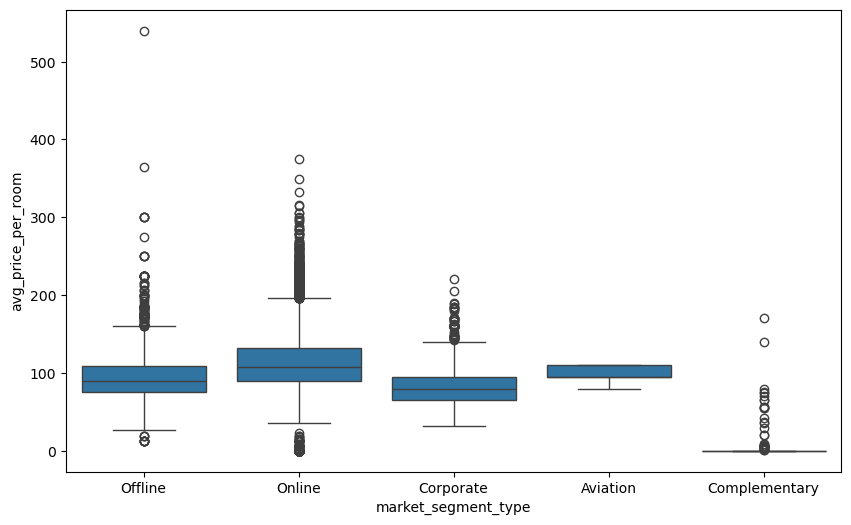

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data = data, x = 'market_segment_type', y = 'avg_price_per_room'
)
plt.show()

Observing the graph above, it is clear that complementary bookings have the lowest median room price. The median prices for the other market segments fall within a relatively narrow range, approximately between 70 and 120. Among these, the online segment has the highest median average room price. Additionally, all segments—except aviation—display many outliers, indicating a wide spread of prices within those categories.

#### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


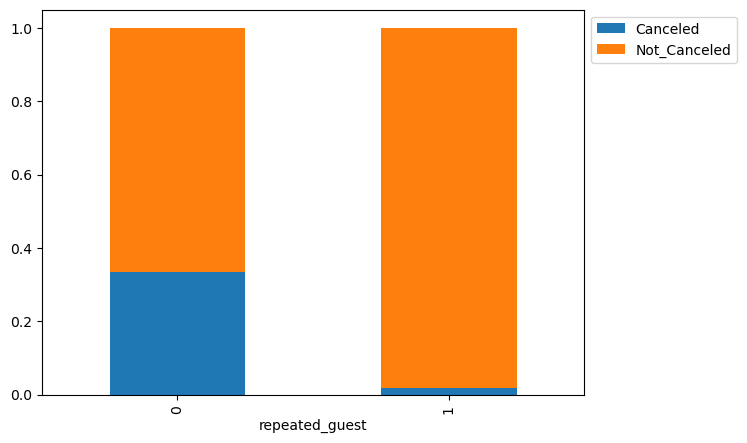

In [23]:
stacked_barplot(data, 'repeated_guest', 'booking_status')

In [24]:
repeat_cancel = (16/930) * 100
print(f'The percentage of repeating guests that cancelled is {repeat_cancel:.2f}%')

The percentage of repeating guests that cancelled is 1.72%


##### 1.72% of repeating guests cancelled a booking.

#### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

no_of_special_requests      0      1     2    3   4  5    All
booking_status                                               
Not_Canceled            11232   8670  3727  675  78  8  24390
All                     19777  11373  4364  675  78  8  36275
Canceled                 8545   2703   637    0   0  0  11885
------------------------------------------------------------------------------------------------------------------------


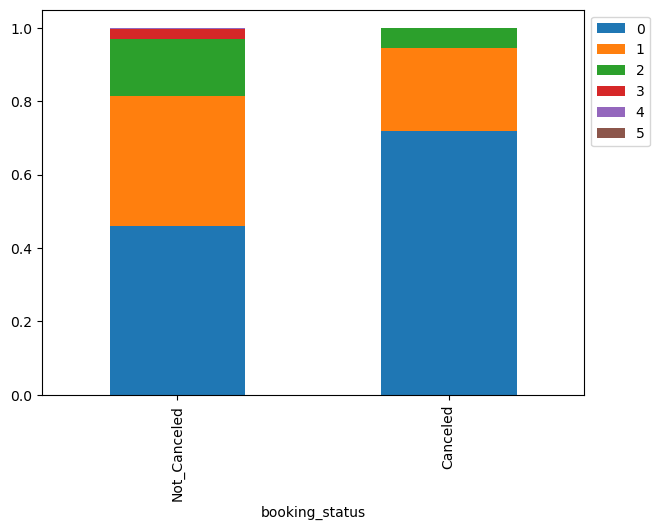

In [25]:
stacked_barplot(data, 'booking_status' , 'no_of_special_requests')

The stacked barplot above shows that special requirements do not really affect booking cancellations as most guest who have not cancelled have the most special requirements requests.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Outlier Check

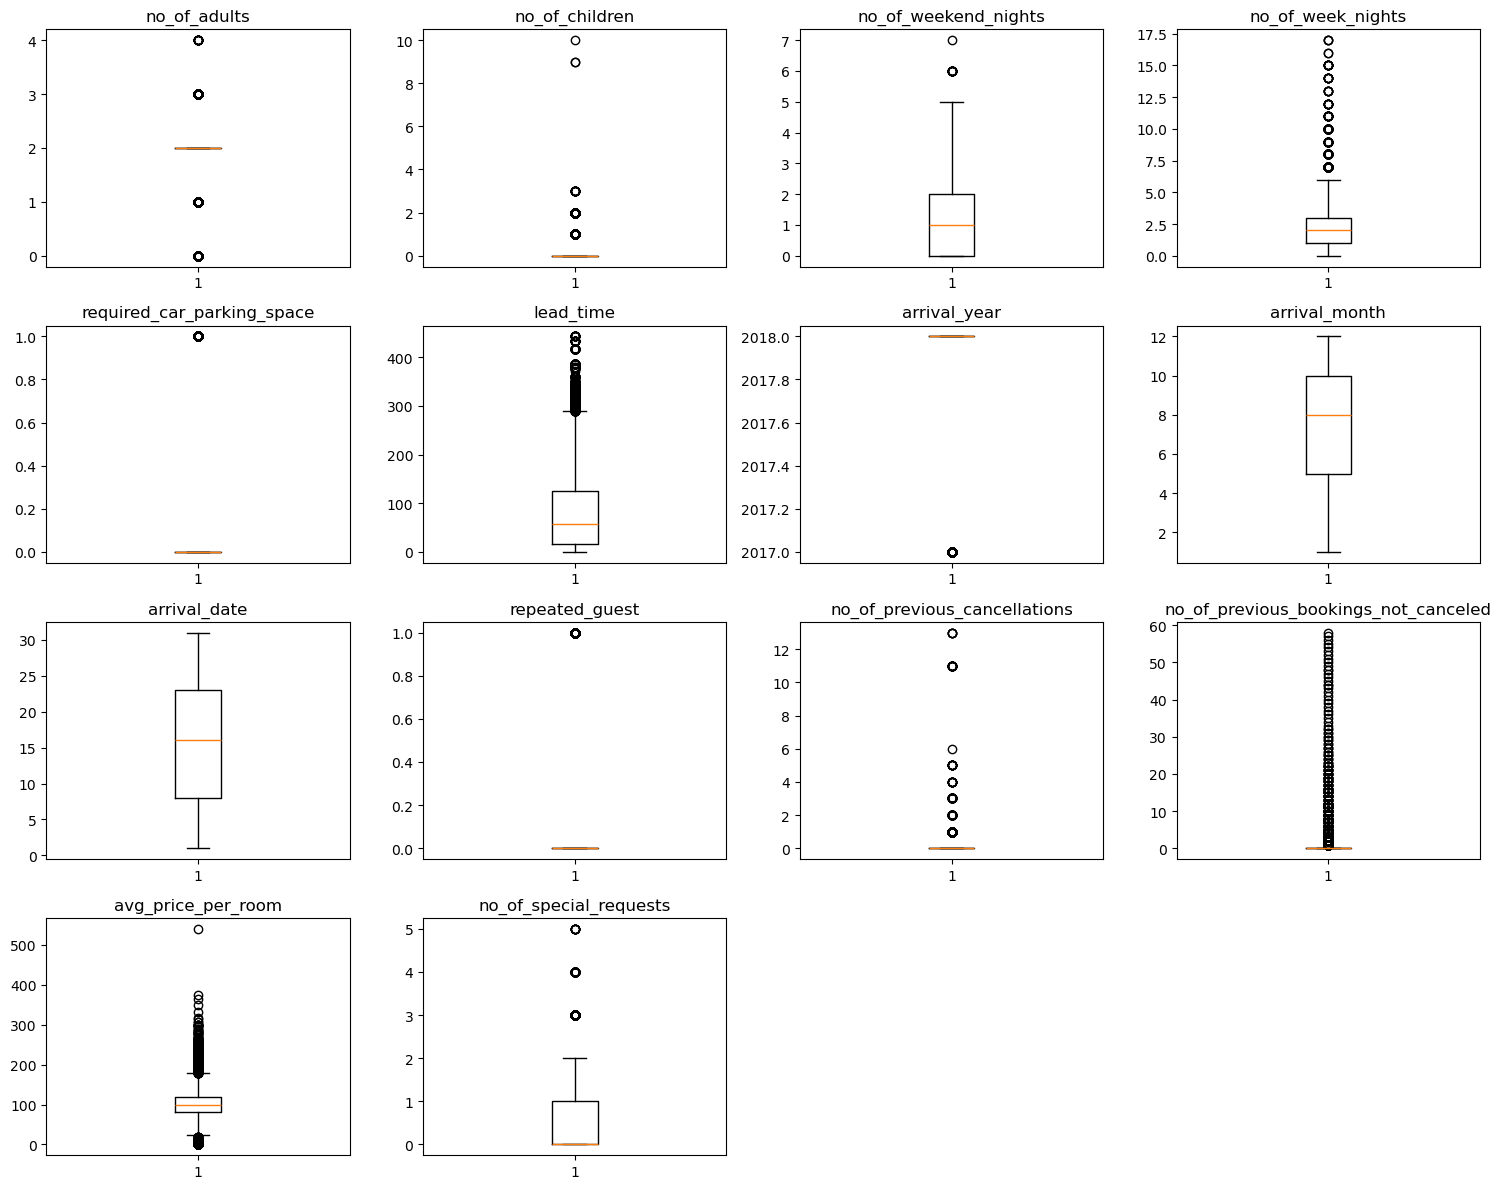

In [26]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Univariate Analysis

#### 1. What are the busiest months in the hotel?

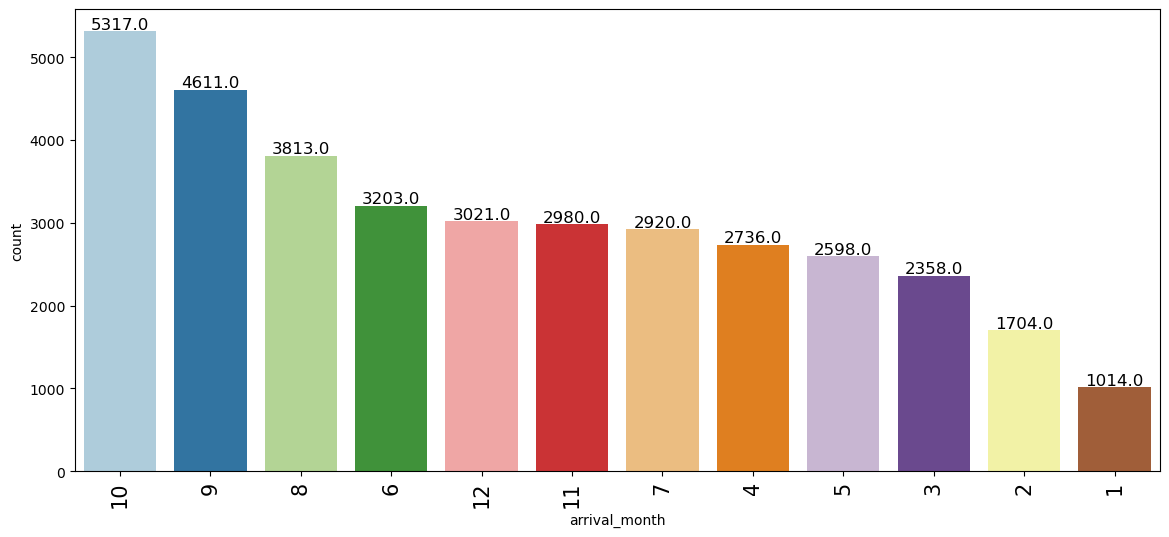

In [27]:
labeled_barplot(data, 'arrival_month')

#### 2. Which market segment do most of the guests come from?

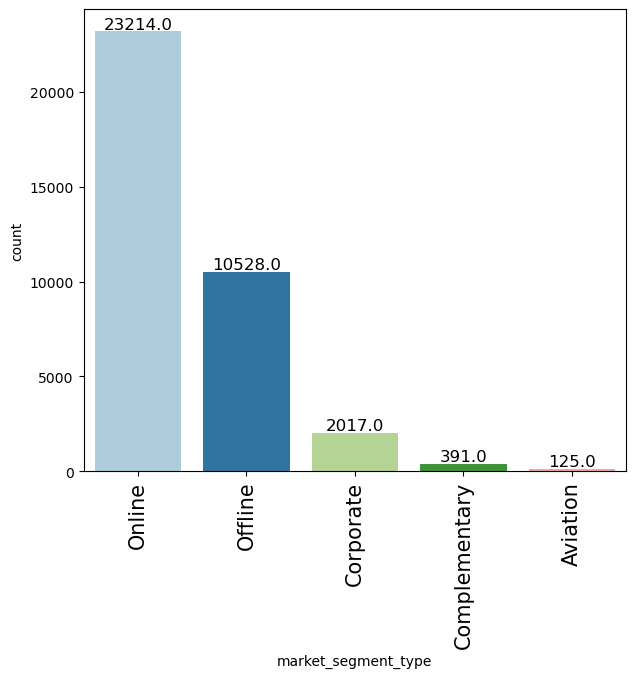

In [28]:
labeled_barplot(data, 'market_segment_type')

#### 4. What percentage of bookings are canceled?

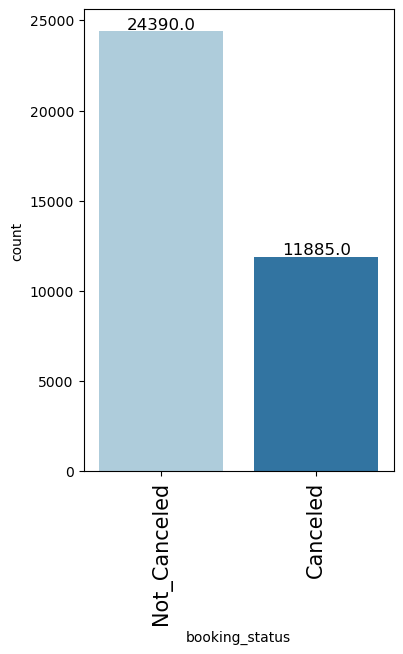

In [29]:
labeled_barplot(data, 'booking_status')

### Bivariate Analysis

#### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

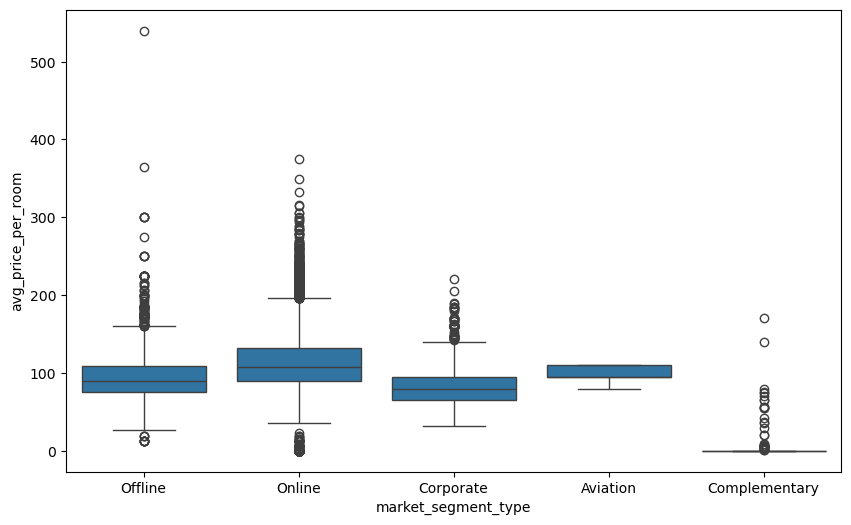

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data = data, x = 'market_segment_type', y = 'avg_price_per_room'
)
plt.show()

#### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


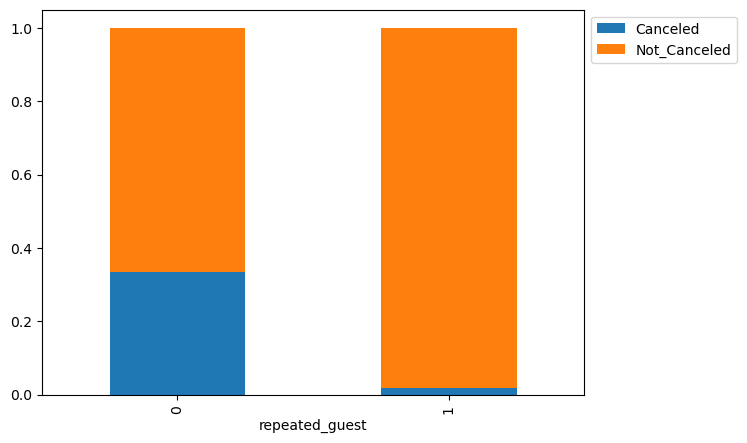

In [31]:
stacked_barplot(data, 'repeated_guest', 'booking_status')

#### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

no_of_special_requests      0      1     2    3   4  5    All
booking_status                                               
Not_Canceled            11232   8670  3727  675  78  8  24390
All                     19777  11373  4364  675  78  8  36275
Canceled                 8545   2703   637    0   0  0  11885
------------------------------------------------------------------------------------------------------------------------


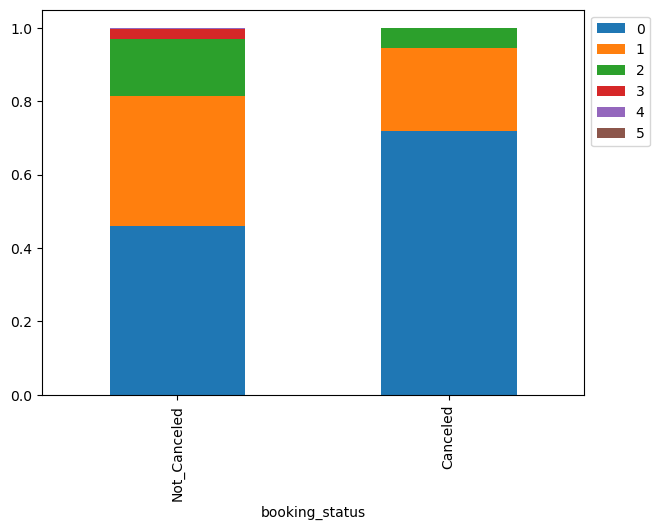

In [32]:
stacked_barplot(data, 'booking_status' , 'no_of_special_requests')

I decided to not treat the outliers, therefore performing a second EDA, the results were the same.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [33]:
# Encoding booking status. Canceled as 1 and Not_Canceled as 0
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


##### Creating training and testing sets

In [34]:
# Splitting the columns into dependent and independent variables
X = data.drop(["booking_status"], axis = 1)
y = data["booking_status"]

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Creating the dummy variables and converting them to integer form from Boolean form
X = pd.get_dummies(
    X,
    columns = X.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True
)

bool_cols = X.select_dtypes(include = ["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.00000,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1.00000,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00000,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.00000,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [35]:
# Splitting data in train and test sets in the 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 42
)

#### Checking multicollinearity

In [36]:
# Define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [37]:
checking_vif(X_train)

,feature,VIF
0,const,39365451.93278
1,no_of_adults,1.34299
2,no_of_children,2.00637
3,no_of_weekend_nights,1.06511
4,no_of_week_nights,1.09149
5,required_car_parking_space,1.03707
6,lead_time,1.39281
7,arrival_year,1.43007
8,arrival_month,1.27171
9,arrival_date,1.00666


There is multicollinearity in the data. Other than the constant and the dummy variables within the market segment, the VIF values are less than 5.

## Building a Logistic Regression model

In [38]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0   0.67399
1   0.32601
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.66857
1   0.33143
Name: proportion, dtype: float64


In [39]:
# Fitting the logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp = False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 10 May 2025   Pseudo R-squ.:                  0.3273
Time:                        18:55:50   Log-Likelihood:                -10783.
converged:                      False   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -836.8666    120.105     -6.968      0.000   -1072.268    -601.465
no_of_adults                             0.1216      

## Model performance evaluation

In [40]:
# Defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [41]:
# Defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

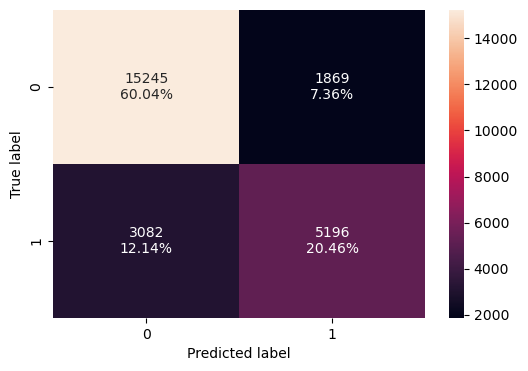

In [42]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [43]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80502,0.62769,0.73546,0.67731


In [44]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)

checking_vif(X_train1)

,feature,VIF
0,const,39291689.90872
1,no_of_adults,1.32591
2,no_of_children,2.00540
3,no_of_weekend_nights,1.06439
4,no_of_week_nights,1.09028
5,required_car_parking_space,1.03704
6,lead_time,1.38817
7,arrival_year,1.42771
8,arrival_month,1.27096
9,arrival_date,1.00664


After removing the market_segment_type_Online, we achieve multicollinearity.

In [45]:
# Fitting the logistic regression model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp = False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 10 May 2025   Pseudo R-squ.:                  0.3273
Time:                        18:55:52   Log-Likelihood:                -10783.
converged:                      False   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -837.7965    119.984     -6.983      0.000   -1072.960    -602.633
no_of_adults                             0.1207      

Negative coefficient reduces the likelihood of cancellation
Positive coefficient increases the likelihood of cancellation

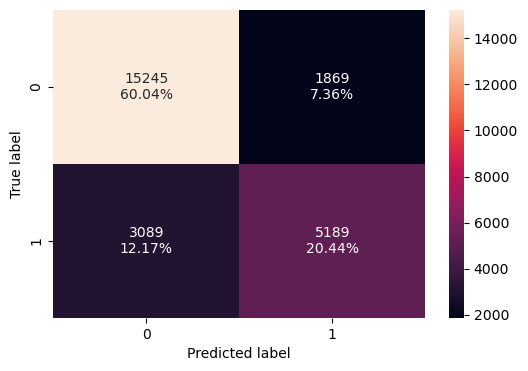

In [46]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [47]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80474,0.62684,0.73519,0.67671


After removing multicollinearity, the model does not change much.

#### Removing high value p value variables

In [48]:
# Initial list of columns
cols = X_train1.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Defining the train set
    X_train_aux = X_train1[cols]

    # Fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Name of the variable with a maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [49]:
X_train2 = X_train1[selected_features]
X_test2 = X_test[selected_features]

In [50]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sat, 10 May 2025   Pseudo R-squ.:                  0.3262
Time:                        18:55:55   Log-Likelihood:                -10800.
converged:                       True   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -825.0606    119.754     -6.890      0.000   -1059.775    -590.346
no_of_adults                       0.1164      0.037      3.144      0.

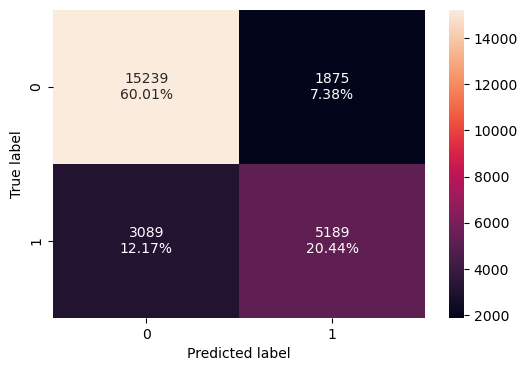

In [51]:
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [52]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg2, X_train2, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80451,0.62684,0.73457,0.67644


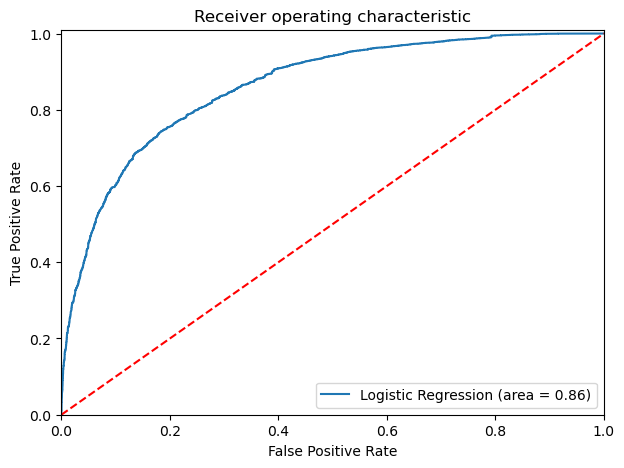

In [53]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Model Performance Improvement

In [54]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.36223892289035614


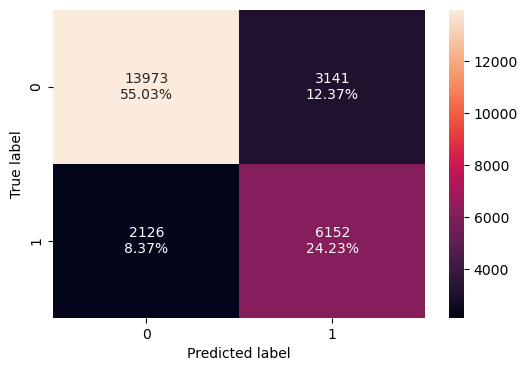

In [55]:
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold = optimal_threshold_auc_roc)

In [56]:
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg2, X_train2, y_train, threshold = optimal_threshold_auc_roc)
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79257,0.74317,0.66200,0.70024


The model performance has improved significantly.

#### Using Precision-Recall curve to see if a better threshold can be found

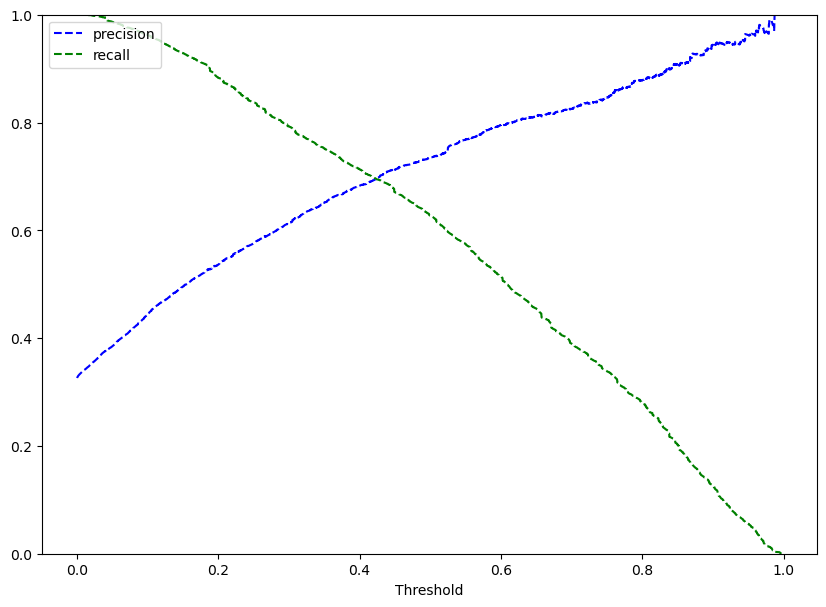

In [57]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [58]:
# Setting the threshold
optimal_threshold_curve = 0.42

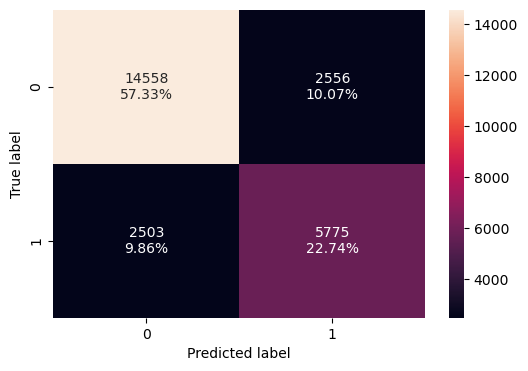

In [59]:
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold = optimal_threshold_curve)

In [60]:
print("Training performance:")
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg2, X_train2, y_train, threshold = optimal_threshold_curve)
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80076,0.69763,0.69319,0.69541


**optimal_threshold_auc_roc** is the threshold I will select as it gives a higher recall, which is more relevant given the business problem. A threhsold of 0.42 on the other hand gives very balanced performance.

### Using the models on the test set

#### Original threshold

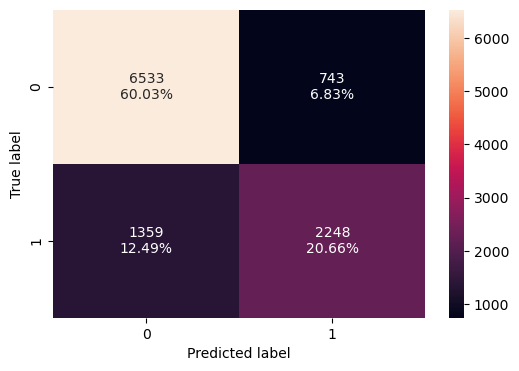

In [61]:
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [62]:
print("Training performance:")
log_reg_model_test_perf = model_performance_classification_statsmodels(lg2, X_test2, y_test)
log_reg_model_test_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80685,0.62323,0.75159,0.68142


The model with the original threshold gives a recall of 62%, precision of 75% and f1 score of 68% on the test set.

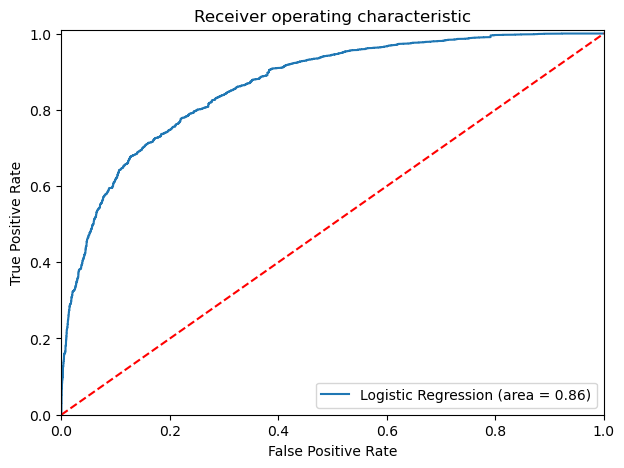

In [63]:
logit_roc_auc_test = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Using model with threshold **optimal_threshold_auc_roc**

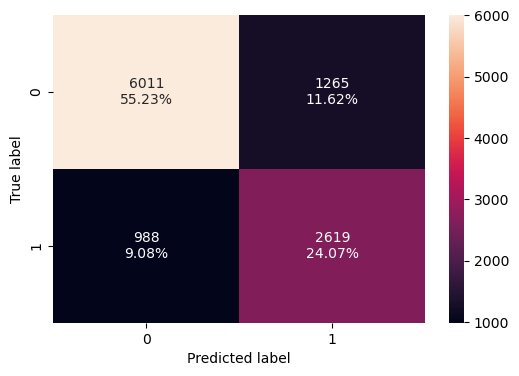

In [64]:
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold = optimal_threshold_auc_roc)

In [65]:
print("Training performance:")
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg2, X_test2, y_test, threshold = optimal_threshold_auc_roc)
log_reg_model_test_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79298,0.72609,0.67430,0.69924


The model with the threshold = 0.3662 gives a recall of 73%, precision of 67% and f1 score of 70% on the test set.

#### Using model with threshold = **0.42**

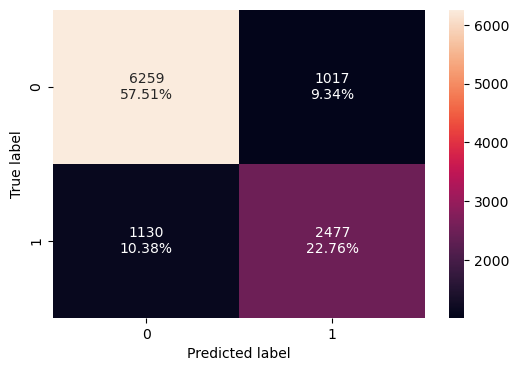

In [66]:
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold = 0.42)

In [67]:
print("Training performance:")
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(lg2, X_test2, y_test, threshold = 0.42)
log_reg_model_test_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80272,0.68672,0.70893,0.69765


The model with the threshold = 0.42 gives a recall of 69%, precision of 71% and f1 score of 70% on the test set.

## Final Model Summary

In [68]:
# Training performance comparison

models_train_compare_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_compare_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.3662 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_compare_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.3662 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80451,0.79257,0.80076
Recall,0.62684,0.74317,0.69763
Precision,0.73457,0.66200,0.69319
F1,0.67644,0.70024,0.69541


In [69]:
# Testing performance comparison

models_test_compare_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_compare_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.3662 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Testing performance comparison:")
models_test_compare_df

Testing performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.3662 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80685,0.79298,0.80272
Recall,0.62323,0.72609,0.68672
Precision,0.75159,0.67430,0.70893
F1,0.68142,0.69924,0.69765


The model with the best f1 score is logistic regression - 0.3662 Threshold. It performed well on both the train and test sets, as there was a very small, negligible disparity.

## Building a Decision Tree model

In [70]:
# Splitting the columns into dependent and independent variables
X = data.drop(["booking_status"], axis = 1)
y = data["booking_status"]

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Creating the dummy variables and converting them to integer form from Boolean form
X = pd.get_dummies(
    X,
    columns = X.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True
)

bool_cols = X.select_dtypes(include = ["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.00000,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1.00000,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00000,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.00000,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [71]:
# Splitting data in train and test sets in the 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 42
)

In [72]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0   0.67399
1   0.32601
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.66857
1   0.33143
Name: proportion, dtype: float64


In [73]:
# Defining a function to compute different metrics to check the performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check the classification model's performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [74]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building the Model

#### Default Decision Tree Model (Without class weights)

In [75]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Model Evaluation

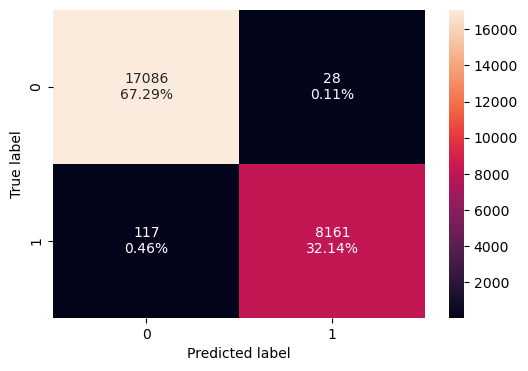

In [76]:
confusion_matrix_sklearn(model, X_train, y_train)

In [77]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.99429,0.98587,0.99658,0.99119


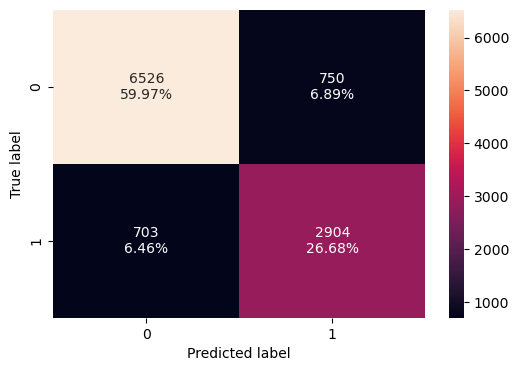

In [78]:
confusion_matrix_sklearn(model, X_test, y_test)

In [79]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.86649,0.80510,0.79475,0.79989


#### Decision Tree Model (With class weights)

In [80]:
model1 = DecisionTreeClassifier(random_state = 42, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

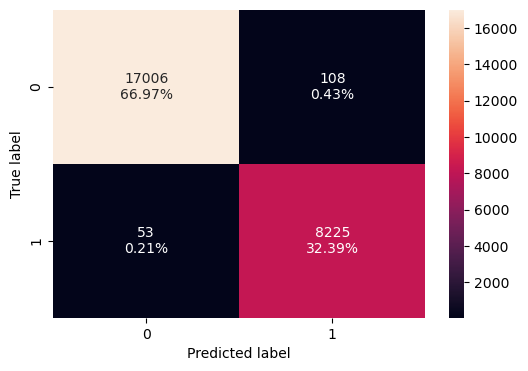

In [81]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [82]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99366,0.99360,0.98704,0.99031


The model is near perfect

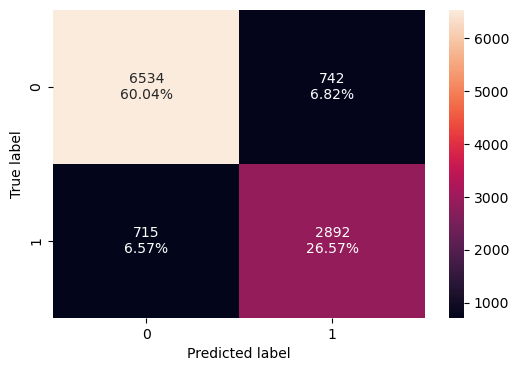

In [83]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [84]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86612,0.80177,0.79582,0.79878


There is a disparity in the model performance on the train and test sets. This suggests overfitting. Therefore pruning techniques will need to be applied.

## Do we need to prune the tree?

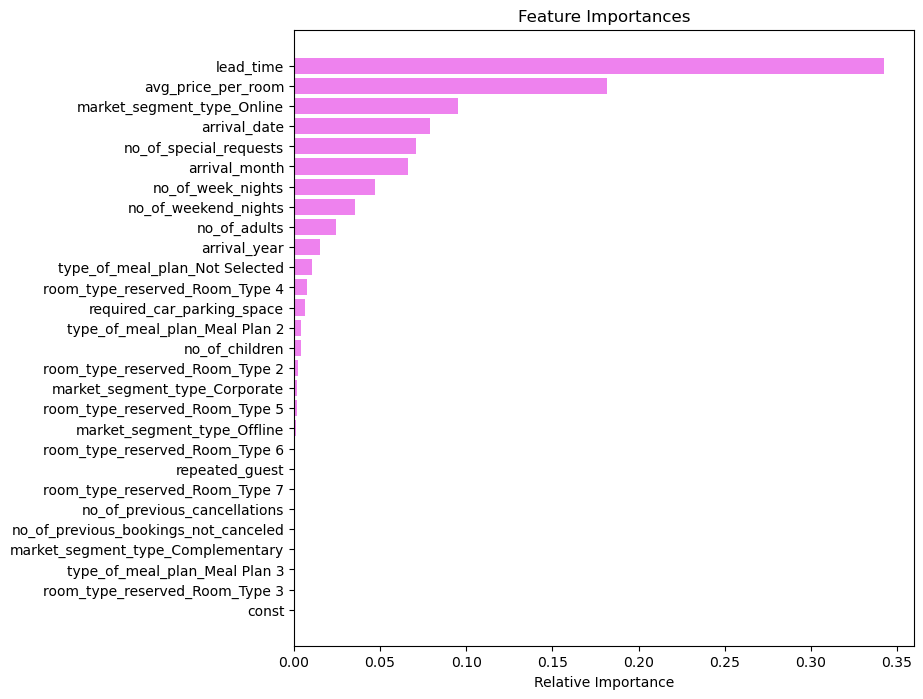

In [85]:
# Checking the important features
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In the default decision tree, lead time and avg_price_per_room are the most important features.

### Decision Tree (Pre-Pruning)

In [86]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state = 42)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring = acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=30,
                       random_state=42)

#### Checking performance of pre-pruned Decision Tree Model

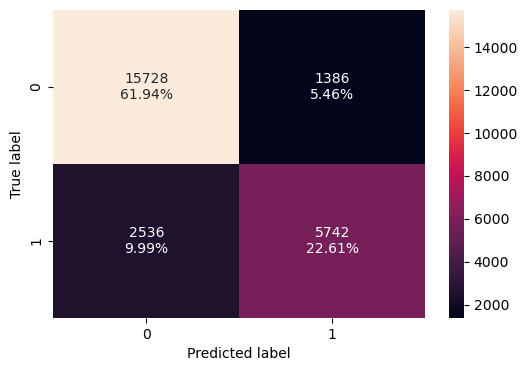

In [87]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [88]:
decision_tree_pretune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_pretune_perf_train

,Accuracy,Recall,Precision,F1
0,0.84554,0.69365,0.80556,0.74542


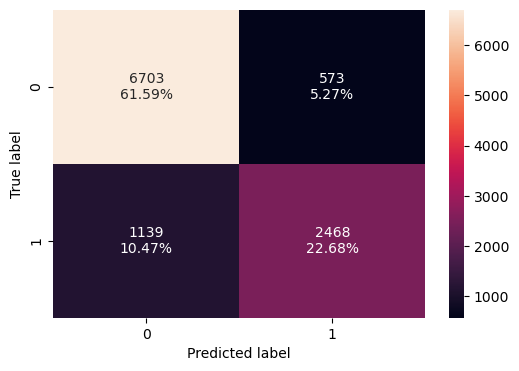

In [89]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [90]:
decision_tree_pretune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_pretune_perf_test

,Accuracy,Recall,Precision,F1
0,0.84269,0.68423,0.81158,0.74248


#### Visualizing the Decision Tree

In [91]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

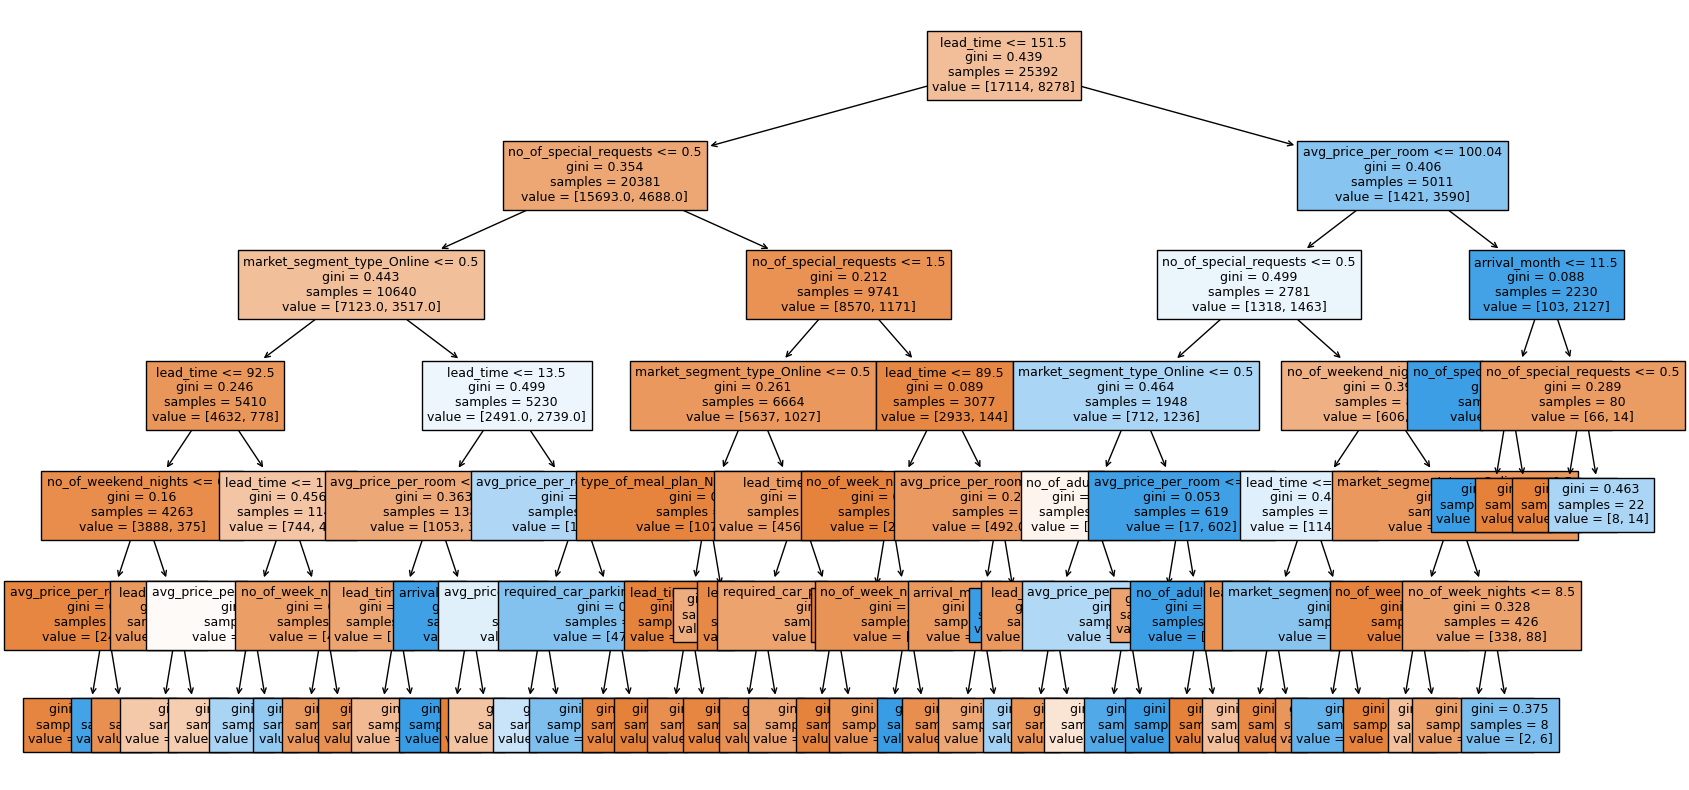

In [92]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [93]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 92.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- weights: [2424.00, 84.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  201.50
|   |   |   |   |   |   |--- weights: [1.00, 18.00] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |--- weights: [1250.00, 152.00] class: 0
|   |   |   |   |   |--- lead_time >  65.50
|   |   |   |   |   |   |--- weights: [213.00, 121.00] class: 0
|   |   |   |--- lead_time >  92.50
|   |   |   |   |--- lead_time <= 116.50
|   |   |   |   |   |--- avg_price_per_room <= 91.22
|   |   |   |   |   |   |--- weights: [220.00, 132.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  91.22
|   |   |   |   |   |   |--- weights: [98.00, 174.00] 

In [94]:
importances = estimator.feature_importances_
importances

array([0.        , 0.02328543, 0.        , 0.01467641, 0.0059224 ,
       0.00885259, 0.46633131, 0.        , 0.01958466, 0.        ,
       0.        , 0.        , 0.        , 0.13626545, 0.13389918,
       0.        , 0.        , 0.00048056, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.19070202])

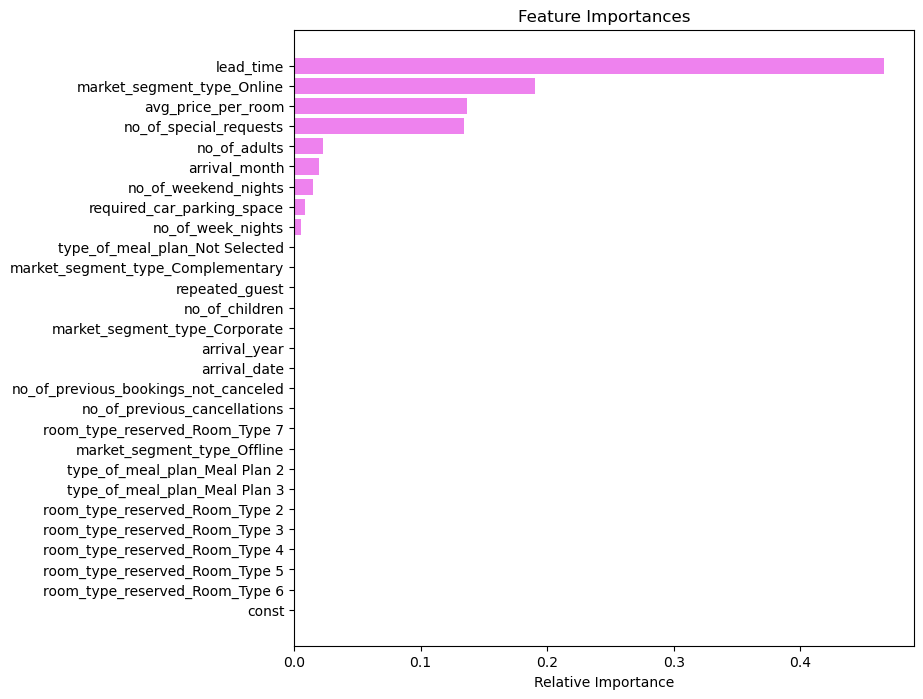

In [95]:
# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In the pre-pruned Decision Tree model, lead time is still the most important feature, but this time market_segment_type_Online is the second most important feature.

### Decision Tree (Post Pruning)

In [96]:
clf = DecisionTreeClassifier(random_state = 42, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [97]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00855
1,-0.00000,0.00855
2,0.00000,0.00855
3,0.00000,0.00855
4,0.00000,0.00855
...,...,...
1574,0.00904,0.32867
1575,0.01017,0.33884
1576,0.01199,0.35084
1577,0.03448,0.41979


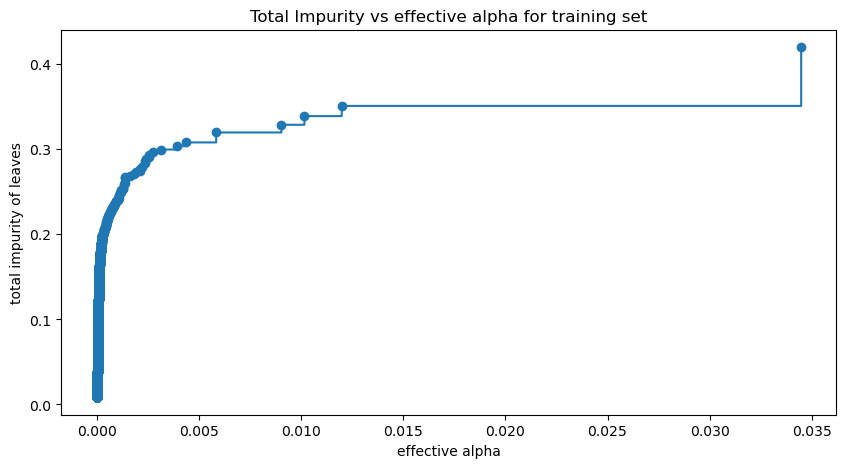

In [98]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [99]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=42, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08021206599375602


In [100]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

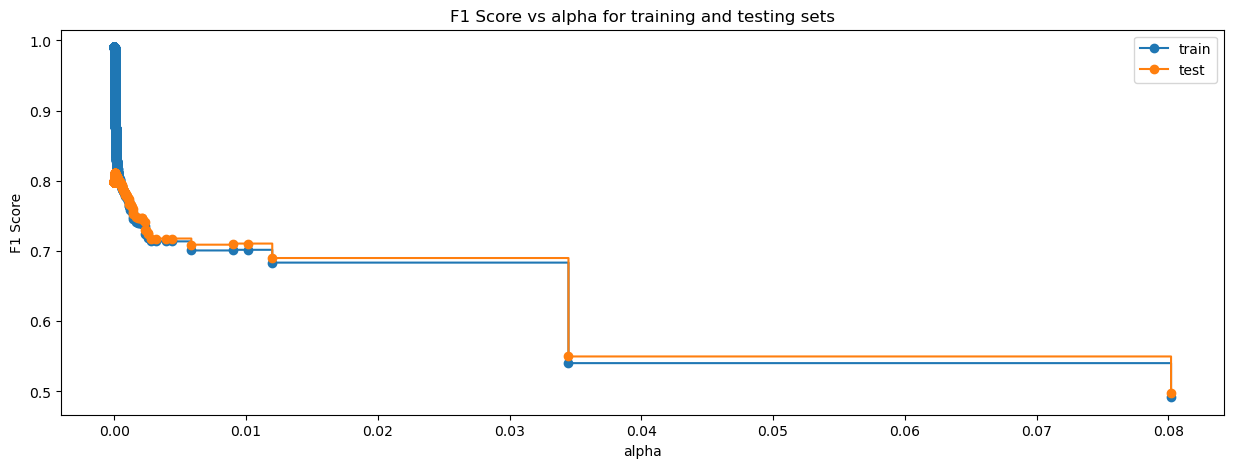

In [101]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [102]:
# Creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=7.433902690207174e-05, class_weight='balanced',
                       random_state=42)


#### Checking performance of post pruned Decision Tree Model

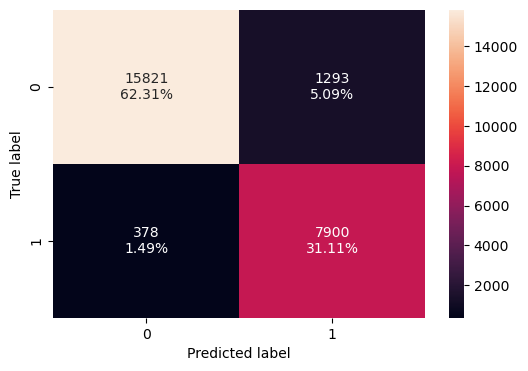

In [103]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [104]:
decision_tree_postprune_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postprune_perf_train

,Accuracy,Recall,Precision,F1
0,0.93419,0.95434,0.85935,0.90436


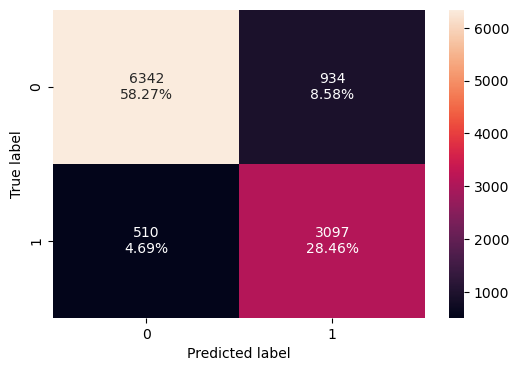

In [105]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [106]:
decision_tree_postprune_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postprune_test

,Accuracy,Recall,Precision,F1
0,0.86732,0.85861,0.76830,0.81095


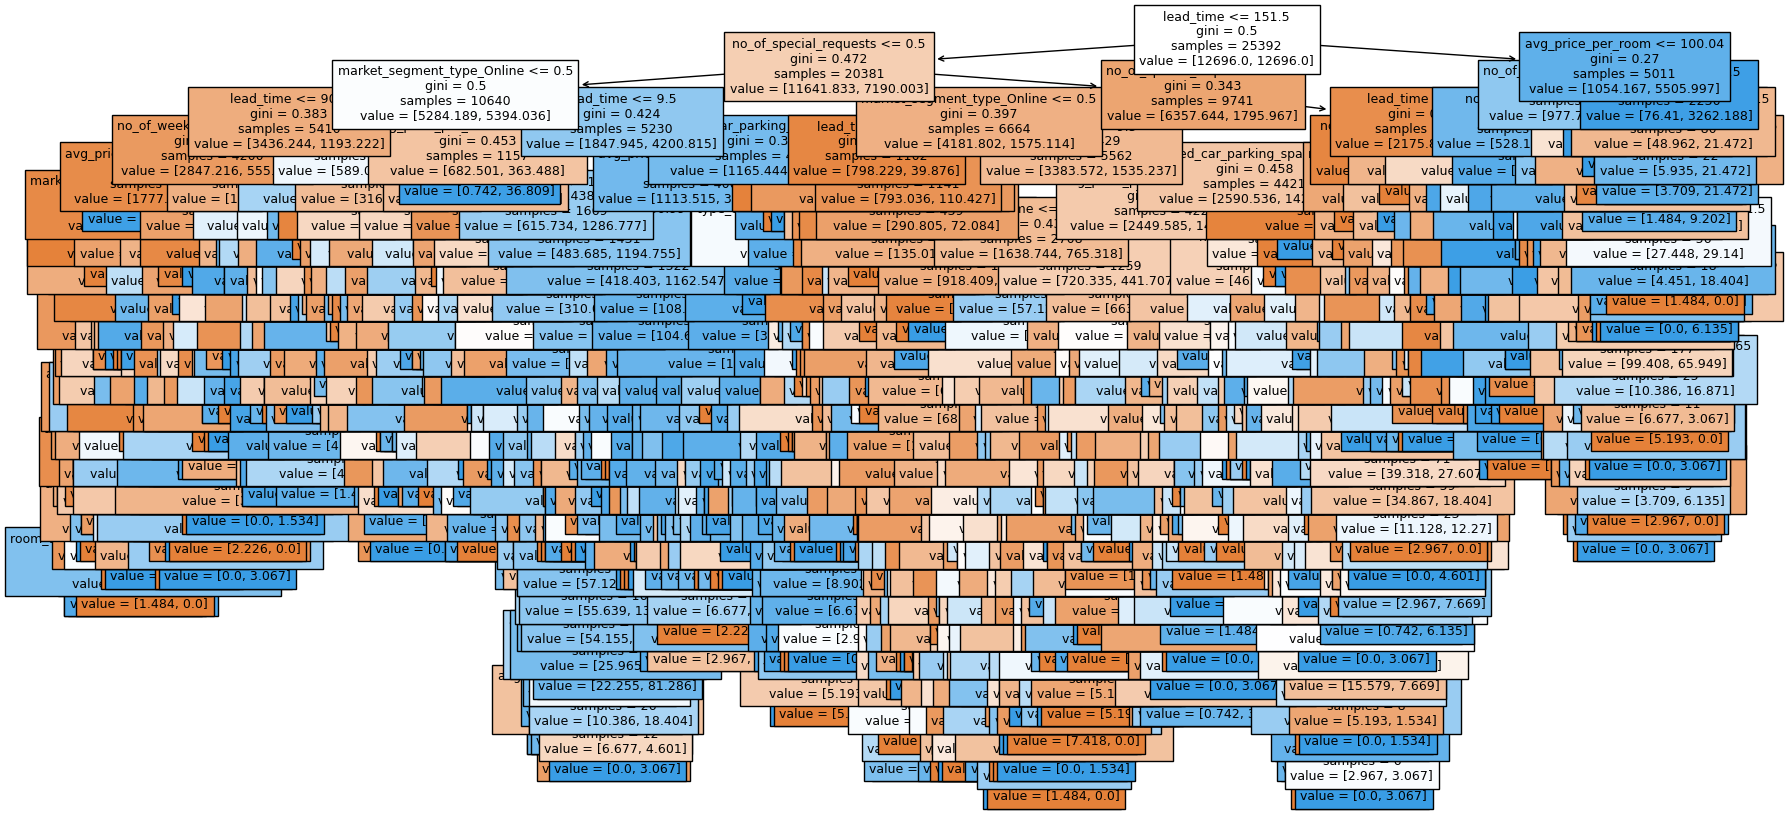

In [107]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [108]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 107.00
|   |   |   |   |   |   |   |   |   |--- weights: [78.64, 1.53] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  107.00
|   |   |   |   |   |   |   |   |   |--- weights: [5.19, 6.13] class: 1
|   |   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |   |--- weights: [1241.11, 0.00] class: 0
|   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 

In [109]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

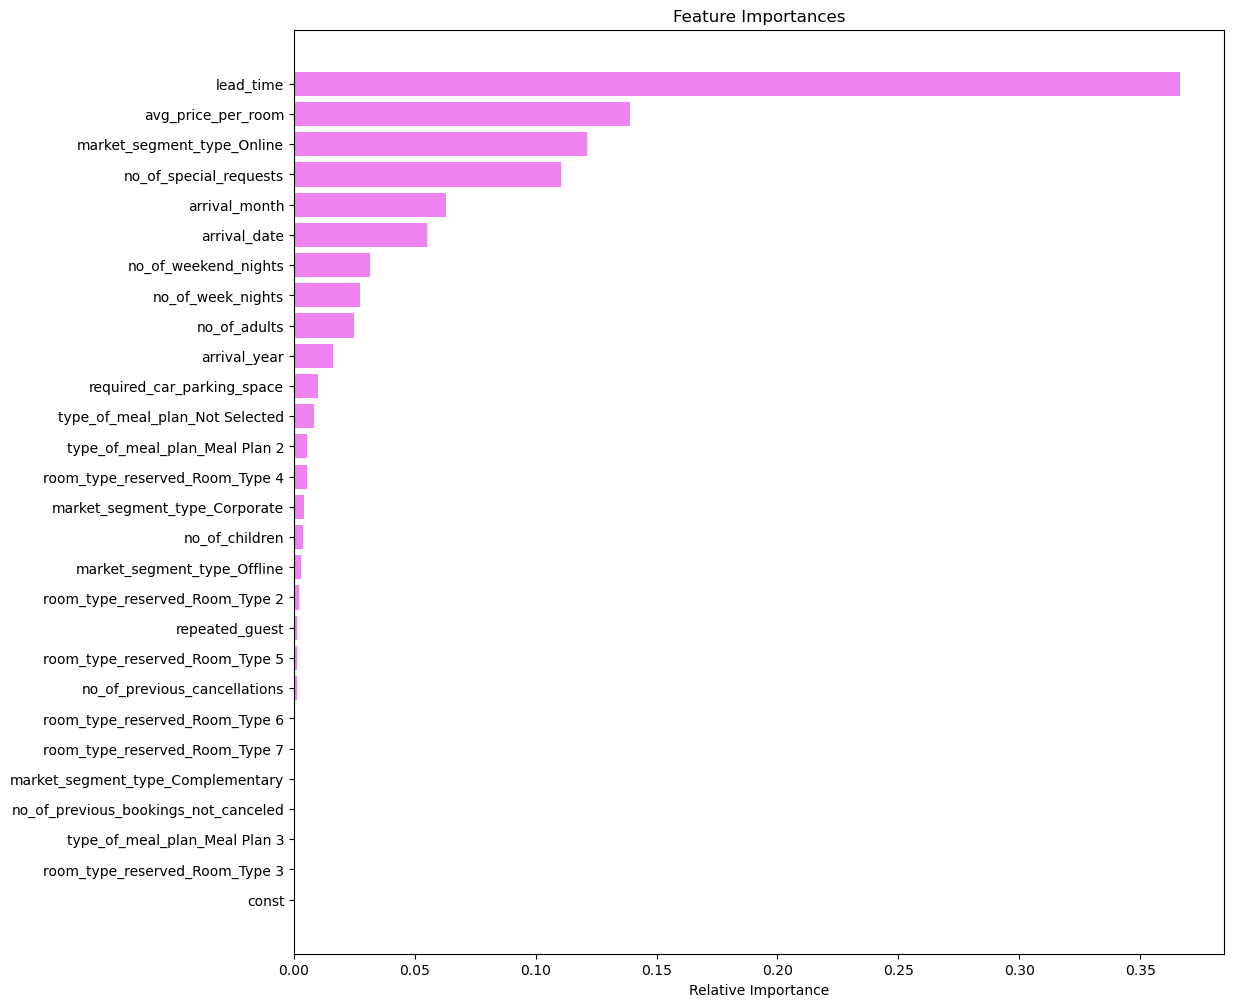

In [110]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In the post pruned Decision Tree model, lead time is the most important feature, closely followed by the avg_price_per_room. In every model, lead time has shown to be the most important feature in this dataset.

## Model Performance Comparison and Conclusions

In [111]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_pretune_perf_train.T,
        decision_tree_postprune_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99429,0.99366,0.84554,0.93419
Recall,0.98587,0.99360,0.69365,0.95434
Precision,0.99658,0.98704,0.80556,0.85935
F1,0.99119,0.99031,0.74542,0.90436


In [112]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_pretune_perf_test.T,
        decision_tree_postprune_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.86649,0.86612,0.84269,0.86732
Recall,0.80510,0.80177,0.68423,0.85861
Precision,0.79475,0.79582,0.81158,0.76830
F1,0.79989,0.79878,0.74248,0.81095


The best decision tree model is the Decision Tree (Pre-Pruning) due to its comparable performance metrics for both the train and test sets, particularly an F1 score of 74%. In contrast, the Decision Tree (Post-Pruning) shows a 10% disparity in F1 scores and a high training F1 score of 90%, indicating potential overfitting.

#### Comparing the best Logistic Regression (0.3662 Threshold) and Decision Tree (Pre-Pruning) Model

#### Accuracy:
The Decision Tree outperforms the Logistic Regression in both the training and test sets (0.85 vs 0.79 on train, 0.84 vs 0.79 on test), indicating that it is better at fitting the data.

#### Recall:
Logistic Regression has a higher recall on both the training and test sets (0.74 vs 0.69 on train, 0.73 vs 0.68 on test), which means it is better at identifying cancellations (i.e., fewer false negatives).

#### Precision:
The Decision Tree has better precision on both sets (0.81 vs 0.66 on test), meaning it is better at minimizing false positives.

#### F1 Score:
The Decision Tree has a higher F1 score on both the train and test sets (0.75 vs 0.70 on train, 0.74 vs 0.70 on test), suggesting a better balance between recall and precision, especially on the test set.

#### Conclusion

**In conclusion, since the Decision Tree (Pre-Pruning) has a higher F1 score on the test set (0.74248 vs 0.69924), it provides a better balance between recall and precision overall. This makes it the recommended model for predicting booking cancellations.**

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

### Actionable Insights & Recommendations
#### Insights

1. Lead time is a strong predictor: longer lead times are associated with higher cancellation rates.

2. Customers who pay deposits are less likely to cancel: suggesting prepayments reduce cancellations.

3. Repeat guests cancel less frequently than first-time guests.

4. Certain market segments (e.g., online TA) have higher cancellation rates → they may book speculatively.

#### Recommendations (Business & Technical)
1. Introduce stricter cancellation policies for long lead-time bookings to discourage speculative bookings.

2. Incentivize prepayment or deposits (e.g., small discount for advance payers) to reduce cancellations.

3. Strengthen loyalty/repeat guest programs since repeat guests cancel less.

4. Target lower-cancellation segments (e.g., corporate, direct bookings) with personalized offers.

5. Monitor bookings from high-cancellation market segments and consider requiring prepayment or guarantees.

6. Deploy the predictive model in real-time for new bookings to flag high-risk cancellations for proactive outreach.